In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [13]:
df = pd.read_csv('./dress_rental_prices.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...,...
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75
29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42


In [14]:
# set ID as index
df.set_index('ID', inplace=True)
df

,Name,Brand,Colour,Catagories,Price
ID,,,,,
74416,Runway stripe dress,Stella McCartney,beige,dresses,111
73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...
872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75


Name            2
Brand           0
Colour          0
Catagories    114
Price           0
dtype: int64


<BarContainer object of 5 artists>

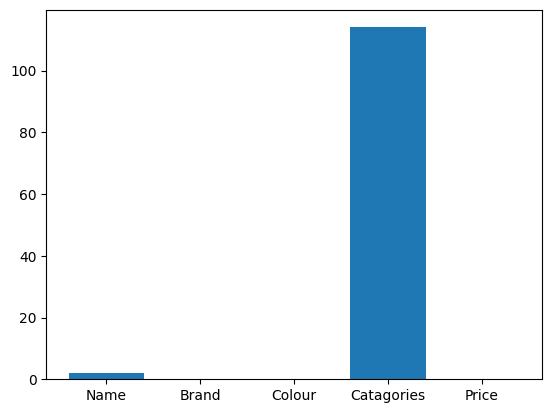

In [15]:
#Check for missing values
print(df.isnull().sum())
plt.bar( df.columns, df.isnull().sum())

In [16]:
# duplicates
df.duplicated().sum()


168

In [17]:
#Drop duplicates
df.drop_duplicates(inplace=True)


<BarContainer object of 5 artists>

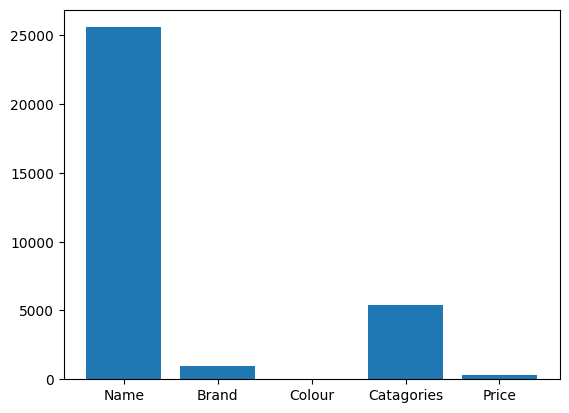

In [18]:
#no. of unique values in each column
plt.bar(df.columns, [df[col].nunique() for col in df.columns])

In [19]:
# rows where name and catagories is null
df[df['Catagories'].isnull()][['Name', 'Catagories']]

,Name,Catagories
ID,,
61602,Terri Dress in Bobcat,NaN
65649,Twill Mini Dress,NaN
33095,Cottage Puff Dress,NaN
27801,Andromeda Gown,NaN
28033,Dress,NaN
...,...,...
55593,Aubrielle white sequin dress,NaN
8496,Wavelength Midi Dress,NaN
26082,NEVA DRESS,NaN


In [20]:
import re
keywords = {}
for i in df.Catagories.dropna():
    
    words = [word.lower() for word in i.split()]
    #remove special characters and numbers
    words = [re.sub(r'[^a-z]', '', word) for word in words]
    for word in words:
        if word in keywords:
            keywords[word] += 1
        else:
            keywords[word] = 1
keywords


{'dresses': 29662,
 'midi': 2862,
 'bottoms': 9,
 'woolcashmere': 224,
 'loose': 1969,
 'winter': 1037,
 '': 1471,
 'sleeves': 1473,
 'scoop': 145,
 'neck': 614,
 'monochrome': 1982,
 'casual': 2302,
 'cottonjersey': 1007,
 'floral': 1685,
 'smart': 3602,
 'seasonal': 3644,
 'maxi': 1566,
 'short': 1165,
 'sleeve': 2798,
 'aline': 2263,
 'mini': 1648,
 'fitted': 45,
 'yk': 1,
 'party': 16,
 'loosefit': 62,
 'shift': 2,
 'smock': 7,
 'cotton': 1216,
 'summer': 3814,
 'baby': 248,
 'blue': 571,
 'green': 617,
 'regularfit': 1290,
 'formal': 1169,
 'tiefront': 464,
 'long': 1239,
 'sleeveless': 930,
 'metallic': 380,
 'ruffled': 447,
 'white': 1756,
 'cowl': 73,
 'light': 256,
 'pinkblush': 251,
 'wrap': 561,
 'lace': 310,
 'skinnyfit': 82,
 'spaghetti': 414,
 'straps': 412,
 'vnecks': 2185,
 'pencil': 254,
 'animal': 197,
 'print': 347,
 'strapless': 108,
 'black': 1526,
 'true': 372,
 'red': 375,
 'mesh': 43,
 'bodycon': 240,
 'bell': 388,
 'crew': 374,
 'leatherfaux': 9,
 'leather': 9,

In [21]:
# MOst common keywords
#words whose frequency is greater than 100
common_keywords = {k:v for k,v in keywords.items() if v>900}
common_keywords

{'dresses': 29662,
 'midi': 2862,
 'loose': 1969,
 'winter': 1037,
 '': 1471,
 'sleeves': 1473,
 'monochrome': 1982,
 'casual': 2302,
 'cottonjersey': 1007,
 'floral': 1685,
 'smart': 3602,
 'seasonal': 3644,
 'maxi': 1566,
 'short': 1165,
 'sleeve': 2798,
 'aline': 2263,
 'mini': 1648,
 'cotton': 1216,
 'summer': 3814,
 'regularfit': 1290,
 'formal': 1169,
 'long': 1239,
 'sleeveless': 930,
 'white': 1756,
 'vnecks': 2185,
 'black': 1526}

In [22]:
#sort the keywords by frequency
sorted_keywords = dict(sorted(common_keywords.items(), key=lambda x:x[1], reverse=True))
sorted_keywords

{'dresses': 29662,
 'summer': 3814,
 'seasonal': 3644,
 'smart': 3602,
 'midi': 2862,
 'sleeve': 2798,
 'casual': 2302,
 'aline': 2263,
 'vnecks': 2185,
 'monochrome': 1982,
 'loose': 1969,
 'white': 1756,
 'floral': 1685,
 'mini': 1648,
 'maxi': 1566,
 'black': 1526,
 'sleeves': 1473,
 '': 1471,
 'regularfit': 1290,
 'long': 1239,
 'cotton': 1216,
 'formal': 1169,
 'short': 1165,
 'winter': 1037,
 'cottonjersey': 1007,
 'sleeveless': 930}

In [23]:
sorted_keywords.keys()

dict_keys(['dresses', 'summer', 'seasonal', 'smart', 'midi', 'sleeve', 'casual', 'aline', 'vnecks', 'monochrome', 'loose', 'white', 'floral', 'mini', 'maxi', 'black', 'sleeves', '', 'regularfit', 'long', 'cotton', 'formal', 'short', 'winter', 'cottonjersey', 'sleeveless'])

In [24]:
for i, row in df[df.Catagories.isnull()].iterrows():
    l = []
    for word in row['Name'].split():
        if word.lower() in keywords.keys():
            l.append(word.lower())
    if l:
        df.loc[i, 'Catagories'] = ' '.join(l)
df.isnull().sum()

Name           2
Brand          0
Colour         0
Catagories    15
Price          0
dtype: int64

In [25]:
df.Catagories.fillna('Others', inplace=True)
df.isnull().sum()

C:\Users\Public\Temp\ipykernel_16548\3665935655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Catagories.fillna('Others', inplace=True)


Name          2
Brand         0
Colour        0
Catagories    0
Price         0
dtype: int64

In [26]:
#remove catagories not in sorted_keywords
for i, row in df.iterrows():
    l = []
    for word in row['Catagories'].split():
        word = word.lower()
        word = re.sub(r'[^a-z]', '', word)
        if word in sorted_keywords.keys():
            l.append(word)
    if l:
        df.loc[i, 'Catagories'] = ','.join(l)
    else:
        df.loc[i, 'Catagories'] = 'Others'

In [27]:
df

,Name,Brand,Colour,Catagories,Price
ID,,,,,
74416,Runway stripe dress,Stella McCartney,beige,dresses,111
73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...
872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses,smart,midi,short,sleeve,monochrome",102
871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses,floral,loose,smart,casual,summer,midi,...",43
844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses,smart,formal,winter,seasonal,mini,vnecks",75


In [28]:
#common catagories in columns 

In [29]:
one_hot = pd.DataFrame(index=df.index, columns=sorted_keywords.keys())
one_hot.fillna(0, inplace=True)
one_hot

C:\Users\Public\Temp\ipykernel_16548\1941177713.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  one_hot.fillna(0, inplace=True)


,dresses,summer,seasonal,smart,midi,sleeve,casual,aline,vnecks,monochrome,...,sleeves,,regularfit,long,cotton,formal,short,winter,cottonjersey,sleeveless
ID,,,,,,,,,,,,,,,,,,,,,
74416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for id in df.index:
    for word in df.loc[id, 'Catagories'].split(','):
        one_hot.loc[id, word] = 1
one_hot


,dresses,summer,seasonal,smart,midi,sleeve,casual,aline,vnecks,monochrome,...,,regularfit,long,cotton,formal,short,winter,cottonjersey,sleeveless,Others
ID,,,,,,,,,,,,,,,,,,,,,
74416,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73815,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73801,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73718,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
73605,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,NaN
871,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,NaN
844,1,0,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,NaN


In [31]:
one_hot.fillna(0, inplace=True)

In [32]:
one_hot['Brand'] = df['Brand']
one_hot['Price'] = df['Price']

In [33]:
one_hot['Color'] = df['Colour']
one_hot

,dresses,summer,seasonal,smart,midi,sleeve,casual,aline,vnecks,monochrome,...,cotton,formal,short,winter,cottonjersey,sleeveless,Others,Brand,Price,Color
ID,,,,,,,,,,,,,,,,,,,,,
74416,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Stella McCartney,111,beige
73815,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Reformation,50,beige
73801,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Ghost,75,beige
73718,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,Coucoo,37,beige
73605,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,RIXO,47,beige
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,0,0,1,1,1,0,0,0,1,...,0,0,1,0,0,0,0.0,Victoria Beckham,102,yellow
871,1,1,0,1,1,0,1,1,1,0,...,0,0,0,0,0,0,0.0,Faithfull The Brand,43,yellow
844,1,0,1,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0.0,Solace London,75,yellow


In [34]:
#one hot encoding for color, brand
one_hot = pd.get_dummies(one_hot, columns=['Brand', 'Color'], drop_first=True)


In [35]:
one_hot = one_hot.astype(int)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X, y = one_hot.drop('Price', axis=1), one_hot['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca

array([[-1.35596011e+00,  6.93642970e-01,  3.39454322e-01, ...,
         1.43379419e-11,  9.71021022e-12,  6.59660997e-12],
       [-1.46803528e+00, -2.01788233e-01,  9.76151525e-02, ...,
         8.98948724e-10,  1.05564131e-09,  9.20096056e-10],
       [-1.25868697e+00, -6.81843012e-01,  3.85644107e-01, ...,
        -1.25206469e-12,  1.25303795e-13,  4.13976277e-13],
       ...,
       [-1.34137085e+00,  6.77022263e-02,  1.52187067e-01, ...,
        -2.08545038e-12,  8.14815950e-12,  1.36870464e-11],
       [-1.34860712e+00, -5.31137898e-01,  1.36688971e-01, ...,
         9.32135416e-13,  6.16450633e-13,  9.86881258e-13],
       [-1.27179673e+00,  1.86391772e-03, -2.02111705e-01, ...,
        -5.30874029e-12,  5.32530203e-12,  2.62633153e-12]])

In [40]:
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# Activatiom functions
def relu(z):
    return np.maximum(0, z)

def d_relu(z):
    return np.where(z > 0, 1, 0)

In [63]:
def layer_sizes(x, y, **kwargs):
    """
    Defines the number of nodes in each layer of the network.
    """
    sizes = [x] + kwargs['hidden_layers'] + [y]
    return sizes

def initialize_parameters(sizes):
    """
    Initializes the weights and biases of the network.
    """
    parameters = {}
    for i in range(1, len(sizes)):
        parameters['W'+str(i)] = np.random.randn(sizes[i], sizes[i-1]) * 0.01
        parameters['b'+str(i)] = np.zeros((sizes[i], 1))
    return parameters

def fwd(x, parameters):
    """ 
    Forward propagation through the network.
    """
    cache = {'A0': x}
    a = x
    L = len(parameters) // 2
    for i in range(1, L+1):
        z = np.dot(parameters['W'+str(i)], a) + parameters['b'+str(i)]
        a = relu(z) if i < L else z  # Linear output for regression
        cache['Z'+str(i)] = z
        cache['A'+str(i)] = a
    return a, cache

def compute_cost(y, y_hat):
    """ Loss Function"""
    m = y.shape[1]
    cost = np.sum((y - y_hat) ** 2) / m
    return cost

def back_prop(x, y, parameters, cache):
    """ Backward propagation through the network."""
    grads = {}
    m = x.shape[1]
    L = len(parameters) // 2
    dz = 2 * (cache['A'+str(L)] - y)  # Derivative of MSE loss w.r.t. linear output
    for i in range(L, 0, -1):
        dw = np.dot(dz, cache['A'+str(i-1)].T) / m
        db = np.sum(dz, axis=1, keepdims=True) / m
        if i > 1:
            dz = np.dot(parameters['W'+str(i)].T, dz) * d_relu(cache['Z'+str(i-1)])
        grads['dW'+str(i)] = dw
        grads['db'+str(i)] = db
    return grads

def update_parameters(parameters, grads, alpha):
    """ Update weights and biases using gradient descent."""
    L = len(parameters) // 2
    for i in range(1, L+1):
        parameters['W'+str(i)] -= alpha * grads['dW'+str(i)]
        parameters['b'+str(i)] -= alpha * grads['db'+str(i)]
    return parameters


In [57]:
def model(x, y, sizes, alpha, epochs):
    parameters = initialize_parameters(sizes)
    for i in range(epochs):
        y_hat, cache = fwd(x, parameters)
        cost = compute_cost(y, y_hat)
        grads = back_prop(x, y, parameters, cache)
        parameters = update_parameters(parameters, grads, alpha)
        if i%100 == 0:
            print(f'Cost after {i} epochs: {cost}')
    return parameters

sizes = layer_sizes(X_train_pca.shape[1], 1, hidden_layers=[128, 64, 16])
parameters = model(X_train_pca.T, y_train.values.reshape(1, -1), sizes, 0.01, 800)

def predict(x, parameters):
    y_hat, cache = fwd(x, parameters)
    return y_hat

y_pred = predict(X_test_pca.T, parameters)

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred.T)

Cost after 0 epochs: 5265.8980508195455
Cost after 100 epochs: 1635.5531539385283
Cost after 200 epochs: 1465.537831279301
Cost after 300 epochs: 1462.5476108622158
Cost after 400 epochs: 1462.4950190251805
Cost after 500 epochs: 1462.494094042759
Cost after 600 epochs: 1462.4940777742174
Cost after 700 epochs: 1462.4940774880872


1437.6576331124274

### Model training using Tensorflow

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(1))

c:\Users\Jay Ajmera\anaconda3\envs\streamlit\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_pca, y_train, epochs=50, batch_size=32, validation_data=(X_test_pca, y_test))


Epoch 1/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 4313.8872 - val_loss: 3431.0725
Epoch 2/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3088.7761 - val_loss: 2589.9351
Epoch 3/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2476.3237 - val_loss: 2040.2218
Epoch 4/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2034.3571 - val_loss: 1710.4381
Epoch 5/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1670.5961 - val_loss: 1537.2075
Epoch 6/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1451.9827 - val_loss: 1371.5444
Epoch 7/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1439.2850 - val_loss: 1268.7653
Epoch 8/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1211.2734 - val_loss: 1191.0153
Epoch 9/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1199.3904 - val_loss: 1134.6333
Epoch 10/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1167.5380 - val_loss: 1088.4725
Epoch 11/50
746/746 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1008.3608 - val_lo

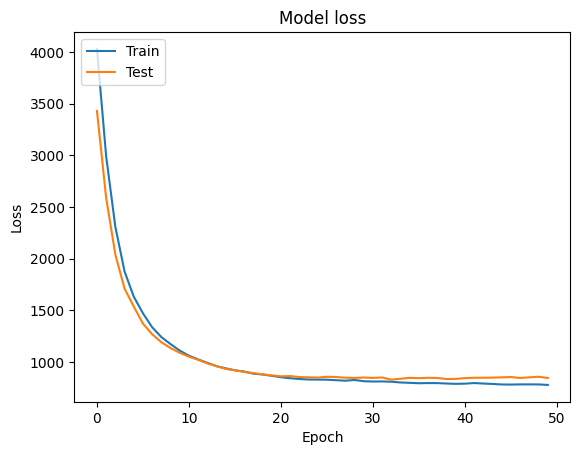

In [64]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
